In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_excel("C:/Users/18573/Downloads/INFO 6105 DS EMT/Assignment/Assignment2/loan.xlsx")
df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [2]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])
df['Res_status'] = encoder.fit_transform(df['Res_status'])
df['Telephone'] = encoder.fit_transform(df['Telephone'])
df['Occupation'] = encoder.fit_transform(df['Occupation'])
df['Job_status'] = encoder.fit_transform(df['Job_status'])
df['Acc_ref'] = encoder.fit_transform(df['Acc_ref'])
df['Liab_ref'] = encoder.fit_transform(df['Liab_ref'])
df['Decision'] = encoder.fit_transform(df['Decision'])

df.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0,1
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0,1
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200,0
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0,1


In [3]:
from sklearn.model_selection import train_test_split

X = df[df.columns[df.columns != 'Decision']]
y = df['Decision']

X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1,34.169998,2.750,0,0,3,4,2,0,1,0,232,200
425,0,22.250000,1.250,1,1,11,6,3,0,0,0,280,0
426,1,23.330000,1.500,0,0,0,0,1,0,0,0,422,200
427,1,21.000000,4.790,1,1,7,2,2,1,1,0,80,300


In [4]:
y

0      1
1      1
2      0
3      0
4      1
      ..
424    1
425    1
426    0
427    0
428    1
Name: Decision, Length: 429, dtype: int32

<AxesSubplot:>

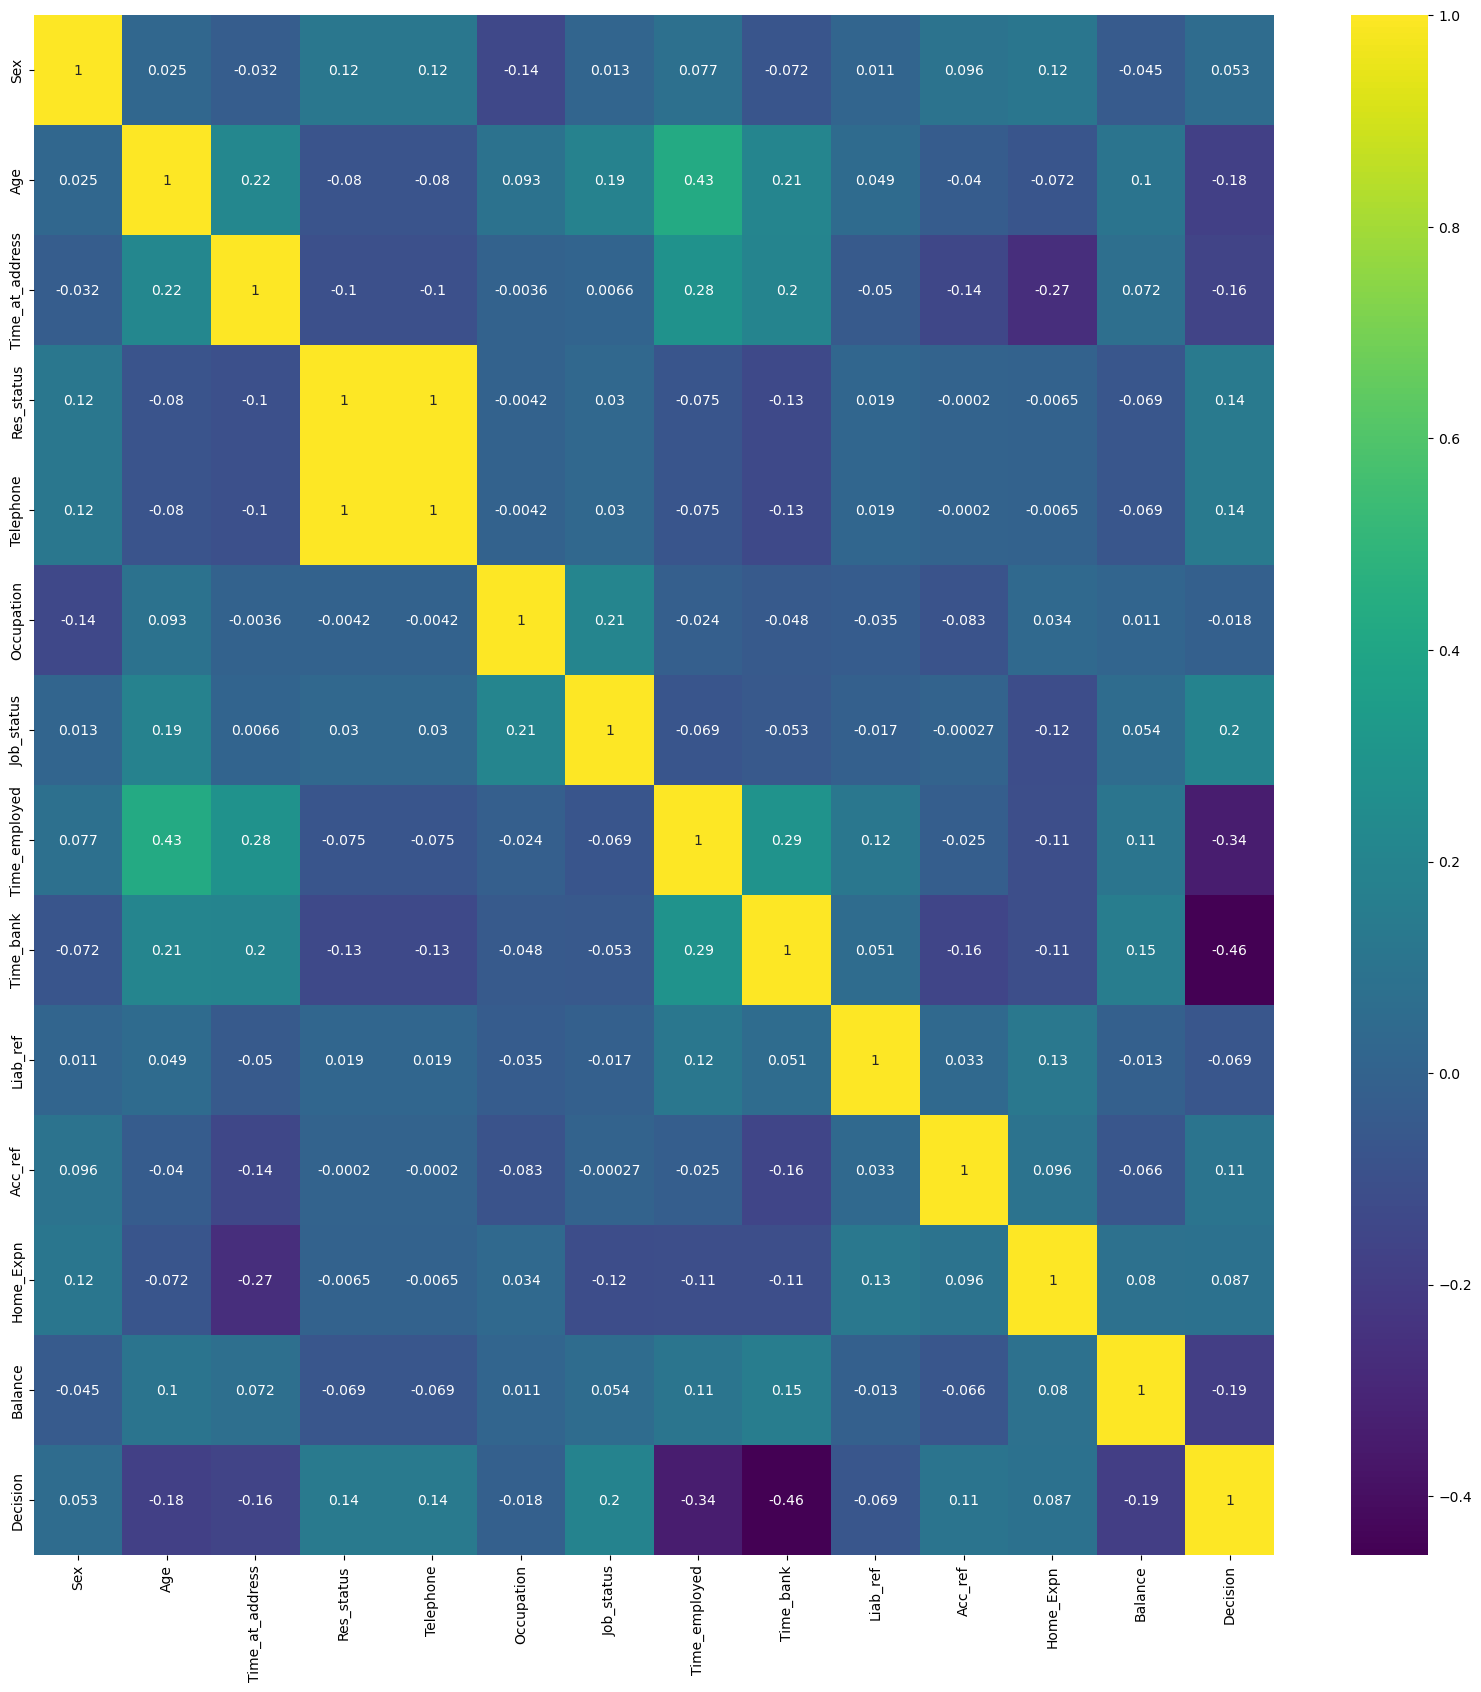

In [5]:
corr_loan = df.corr()
top_corr_features = corr_loan.index
plt.figure(figsize=(20,20))

sns.heatmap(df[top_corr_features].corr(),annot=True, cmap='viridis')

In [6]:
#X = sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Decision   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              63.78
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    1.74e-86
Time:                        15:30:31   Log-Likelihood:                         -257.90
No. Observations:                 429   AIC:                                      539.8
Df Residuals:                     417   BIC:                                      588.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [7]:
X

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
0,1,50.750000,0.585,0,0,11,6,0,0,0,0,145,0
1,1,19.670000,10.000,1,1,4,0,0,0,1,0,140,0
2,0,52.830002,15.000,0,0,0,2,5,14,0,0,0,2200
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0
4,1,29.250000,13.000,0,0,1,0,0,0,0,0,228,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,1,34.169998,2.750,0,0,3,4,2,0,1,0,232,200
425,0,22.250000,1.250,1,1,11,6,3,0,0,0,280,0
426,1,23.330000,1.500,0,0,0,0,1,0,0,0,422,200
427,1,21.000000,4.790,1,1,7,2,2,1,1,0,80,300


In [8]:
#X = sm.add_constant(X)
model = sm.OLS(y,X)

result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:               Decision   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.637
Method:                 Least Squares   F-statistic:                              63.78
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    1.74e-86
Time:                        15:30:31   Log-Likelihood:                         -257.90
No. Observations:                 429   AIC:                                      539.8
Df Residuals:                     417   BIC:                                      588.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,shuffle=True)

In [10]:
X_train

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance
3,1,22.670000,2.540,1,1,0,0,2,0,0,0,0,0
18,0,22.500000,0.415,0,0,3,2,0,0,1,1,144,0
327,1,25.170000,6.000,0,0,0,2,1,3,0,0,0,0
60,1,39.580002,5.000,0,0,11,6,0,2,0,0,17,1
369,1,40.250000,21.500,0,0,2,3,20,11,0,0,0,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,22.920000,3.165,1,1,0,2,0,0,0,0,160,1058
106,1,69.169998,9.000,0,0,11,6,4,1,0,0,70,6
270,1,26.330000,13.000,0,0,2,5,0,0,1,0,140,1110
348,1,22.580000,1.500,1,1,9,2,0,0,1,0,120,67


In [11]:
print('Train dataset X: ', X_train.shape, ', Test dataset X: ', X_test.shape)

Train dataset X:  (321, 13) , Test dataset X:  (108, 13)


In [12]:
print('Train dataset y: ', y_train.shape, ', Test dataset y: ', y_test.shape)

Train dataset y:  (321,) , Test dataset y:  (108,)


In [13]:
from sklearn.impute import SimpleImputer

X_train.iloc[:, 0]

3      1
18     0
327    1
60     1
369    1
      ..
71     1
106    1
270    1
348    1
102    0
Name: Sex, Length: 321, dtype: int32

In [14]:
y_train

3      0
18     1
327    0
60     1
369    0
      ..
71     1
106    1
270    1
348    1
102    1
Name: Decision, Length: 321, dtype: int32

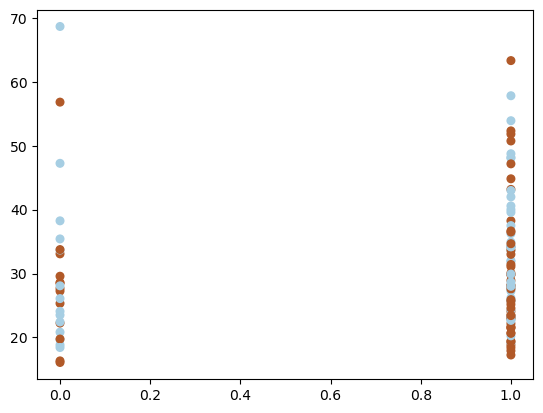

In [15]:
from sklearn import svm

clf_sig = svm.SVC(kernel='sigmoid').fit(X_train,y_train)

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, s=30, cmap=plt.cm.Paired)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_auc_score, auc

y_pred = clf_sig.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)
print("report",classification_report(y_pred,y_test))

Accuracy:  0.6574074074074074
report               precision    recall  f1-score   support

           0       0.49      0.69      0.57        36
           1       0.81      0.64      0.71        72

    accuracy                           0.66       108
   macro avg       0.65      0.67      0.64       108
weighted avg       0.70      0.66      0.67       108



Text(95.72222222222221, 0.5, 'Reject')

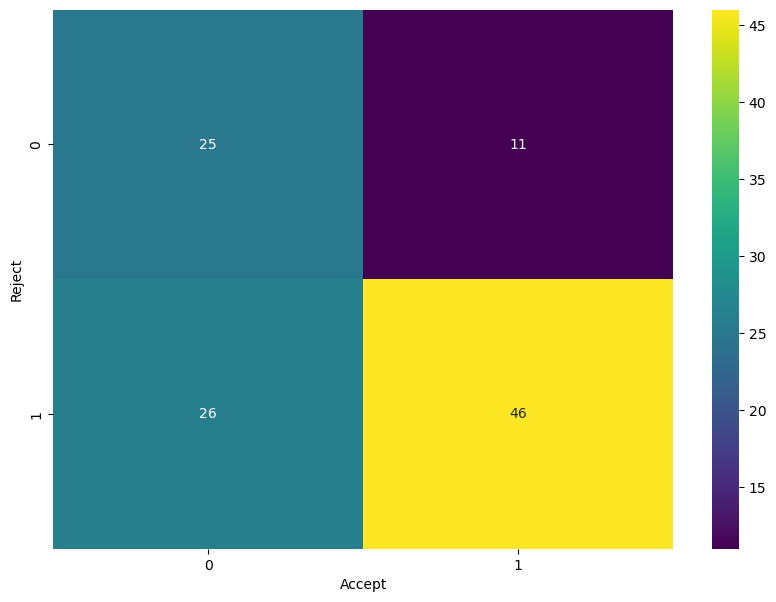

In [17]:
cm = confusion_matrix(y_pred,y_test)
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Accept')
plt.ylabel('Reject')

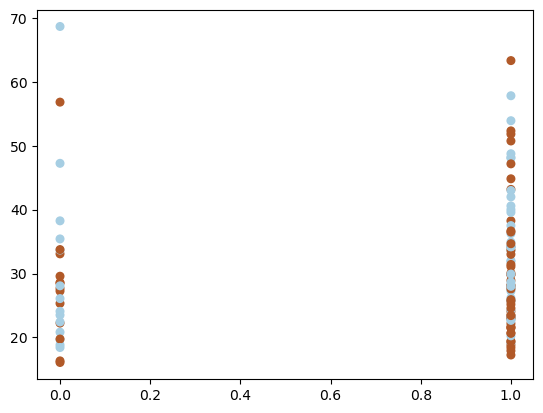

In [18]:
clf_rbf = svm.SVC(kernel='rbf', random_state=0).fit(X_train,y_train)

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, s=30, cmap=plt.cm.Paired)
plt.show()

In [19]:
y_pred = clf_rbf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)
print("report",classification_report(y_pred,y_test))

Accuracy:  0.6203703703703703
report               precision    recall  f1-score   support

           0       0.27      0.78      0.41        18
           1       0.93      0.59      0.72        90

    accuracy                           0.62       108
   macro avg       0.60      0.68      0.56       108
weighted avg       0.82      0.62      0.67       108



Text(95.72222222222221, 0.5, 'Reject')

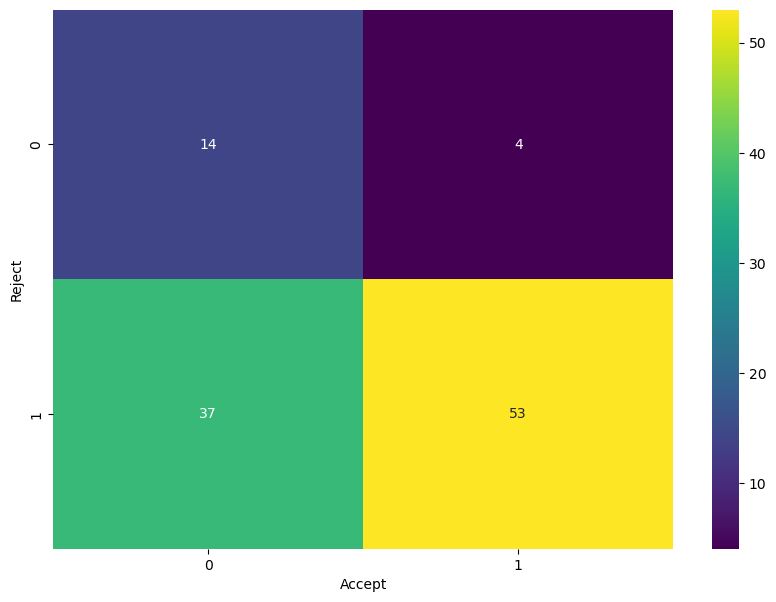

In [20]:
cm = confusion_matrix(y_pred,y_test)
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Accept')
plt.ylabel('Reject')

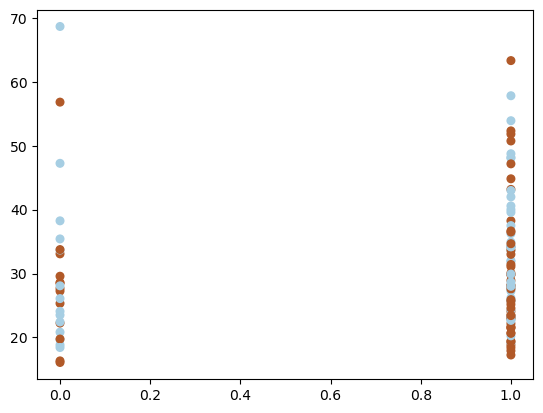

In [21]:
clf_poly = svm.SVC(kernel='poly', degree=4).fit(X_train,y_train)

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, s=30, cmap=plt.cm.Paired)
plt.show()

In [22]:
y_pred = clf_poly.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)
print("report",classification_report(y_pred,y_test))

Accuracy:  0.5462962962962963
report               precision    recall  f1-score   support

           0       0.06      0.75      0.11         4
           1       0.98      0.54      0.70       104

    accuracy                           0.55       108
   macro avg       0.52      0.64      0.40       108
weighted avg       0.95      0.55      0.67       108



Text(95.72222222222221, 0.5, 'Reject')

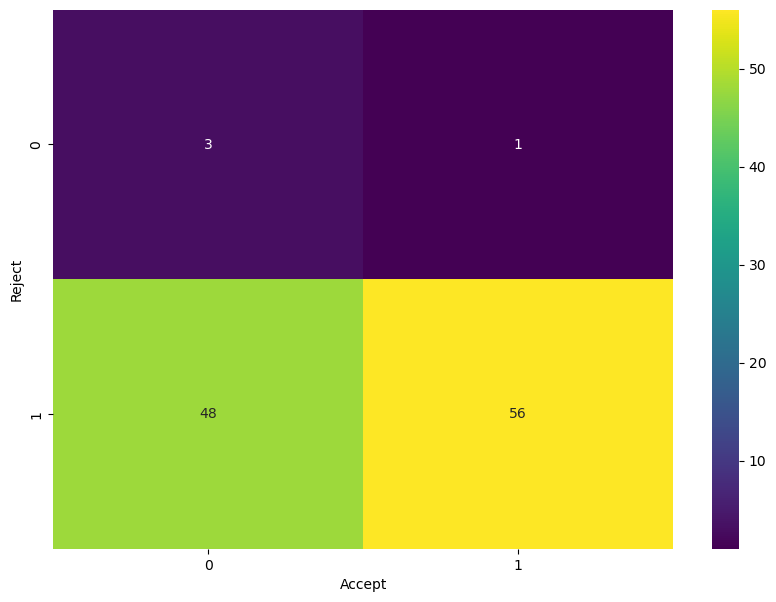

In [23]:
cm = confusion_matrix(y_pred,y_test)
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Accept')
plt.ylabel('Reject')

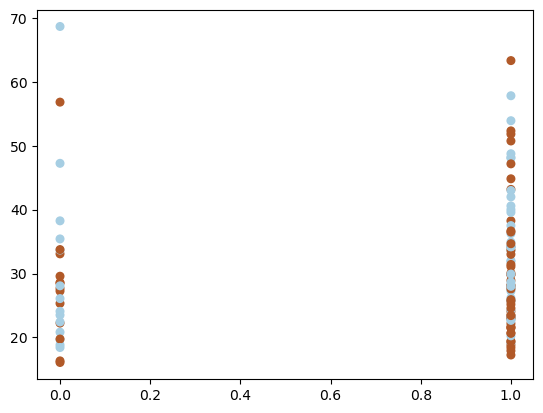

In [24]:
clf_lin = svm.SVC(kernel='linear').fit(X_train,y_train)
#clf_lin.fit(X_train,y_train)

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, s=30, cmap=plt.cm.Paired)
plt.show()

In [25]:
y_pred = clf_lin.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: ', acc)
print("report",classification_report(y_pred,y_test))
print("Area under curve (auc): ", roc_auc_score(y_pred, y_test))

Accuracy:  0.7685185185185185
report               precision    recall  f1-score   support

           0       0.67      0.81      0.73        42
           1       0.86      0.74      0.80        66

    accuracy                           0.77       108
   macro avg       0.76      0.78      0.76       108
weighted avg       0.78      0.77      0.77       108

Area under curve (auc):  0.775974025974026


Text(95.72222222222221, 0.5, 'Reject')

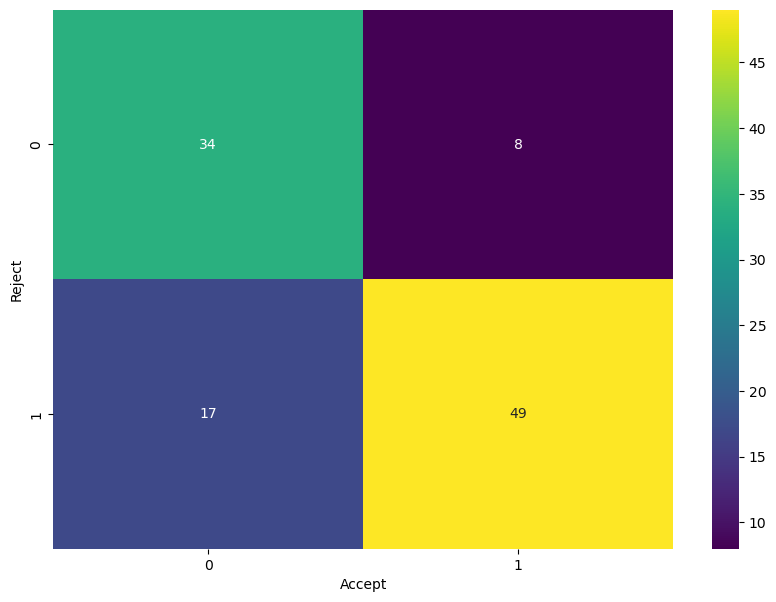

In [26]:
cm = confusion_matrix(y_pred,y_test)
cm
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, cmap='viridis')
plt.xlabel('Accept')
plt.ylabel('Reject')

In [27]:
X.drop(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone', 'Occupation', 'Liab_ref', 'Acc_ref', 'Home_Expn', 'Balance', 'Job_status'], axis=1, inplace=True)

C:\Users\18573\AppData\Local\Temp\ipykernel_31224\1554091639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Sex', 'Age', 'Time_at_address', 'Res_status', 'Telephone', 'Occupation', 'Liab_ref', 'Acc_ref', 'Home_Expn', 'Balance', 'Job_status'], axis=1, inplace=True)


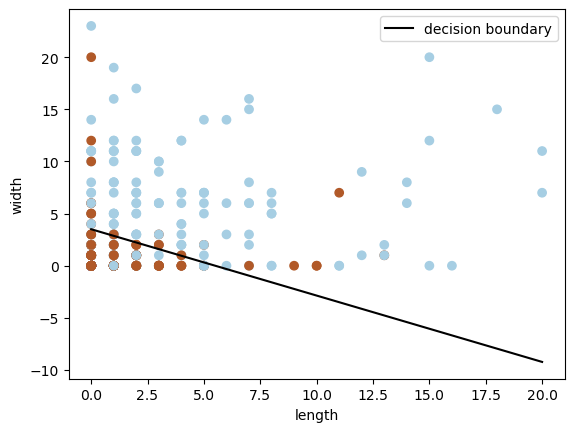

In [28]:
# Extract the slope and intercept of the decision boundary
svc = svm.SVC(kernel='linear').fit(X, y)

w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X.iloc[:, 0].min(), X.iloc[:, 0].max())
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the decision boundary and the data
plt.plot(xx, yy, 'k-', label='decision boundary')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('length')
plt.ylabel('width')
plt.legend()
plt.show()